<a href="https://colab.research.google.com/github/Elcejas77/Aprendizaje-de-Maquina/blob/main/Parcial1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboleda Cuero  Diego Alejandro
#cc:1087834596
# TAM Parcial 1_Punto 1


Se adjunta el link de la parte teoria:https://github.com/Elcejas77/Aprendizaje-de-Maquina/blob/198899e2d5634659f43823feb16b37b67a9df873/TAM-Parcial1-Punto1.pdf

# TAM Parcial 1_Punto 2


#Funciones y Lectura de la base de datos

Importamos lo que necesitamos al principio,para que el codigo se vea un poco mas limpio

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Empezamos cargando la base de datos con la cual vamos a trabajar

In [ ]:
# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv('/content/2023_nba_player_stats.csv')
# Muestra las primeras filas del DataFrame para verificar la lectura
print(df.head())


                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]


Guardamos el archivo leido en una variable distinta para su mejor trabajo

In [ ]:
datos=df

Procedemos a realizar la limpieza,adecuacion y transformacion de los datos de la base para el adecuado manejo,teniendo en cuenta que el trabajar con variables numericas nos da mas facilidad que trabajar con variables categoricas ,y que las filas con datos nulos pueden afectar a nuestro modelo .

In [ ]:
datos = datos.dropna() # Elimina las filas con valores nulos
datos = datos.drop_duplicates() # Elimina las filas duplicadas
col_drop = ['PName'] #retiramos la columna con los nombres,dado que el nombre del jugador no influye en nada con su capacidad de hacer puntos
datos.drop(columns=col_drop, inplace=True)

le = LabelEncoder()
for column in ['POS', 'Team',]:#transformamos las columnas con variables categoricas a variables numericas
    datos[column] = le.fit_transform(datos[column])
# Muestra las primeras filas del DataFrame para verificar la correcta depuracion
print(datos.head())


   POS  Team  Age  GP   W   L     Min   PTS  FGM   FGA  ...  REB  AST  TOV  \
0    5     2   25  74  52  22  2732.2  2225  727  1559  ...  649  342  213   
1    0    22   29  66  43  23  2284.1  2183  728  1328  ...  670  274  226   
2    4     6   24  66  33  33  2390.5  2138  719  1449  ...  569  529  236   
3    4    20   24  68  33  35  2416.0  2135  704  1381  ...  329  371  192   
4    3    16   28  63  47  16  2023.6  1959  707  1278  ...  742  359  246   

   STL  BLK   PF    FP  DD2  TD3  +/-  
0   78   51  160  3691   31    1  470  
1   66  112  205  3706   39    1  424  
2   90   33  166  3747   36   10  128  
3  112   65  192  3425    3    0  149  
4   52   51  197  3451   46    6  341  

[5 rows x 29 columns]


# Preparacion de datos y definicion de OBJETIVO(PTS)

Realizamos la division de los datos de la base quitando la columna objetivo ,se dividen entre datos de entrenamiento y prueba ,al mismo tiempo que escalamos los datos

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = datos.drop('PTS', axis=1)  # Características (todas las columnas excepto 'PTS')
y = datos['PTS']  # Variable objetivo ('PTS')

# Normalizar las variables con las cuales vamos a trabajar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (427, 28)
Forma de X_test: (107, 28)
Forma de y_train: (427,)
Forma de y_test: (107,)


Con la Ayuda de la IA que nos ofrece colab,graficamos la columna objetivo contra las columnas restantes de nuesra base ,para observar su distribucion

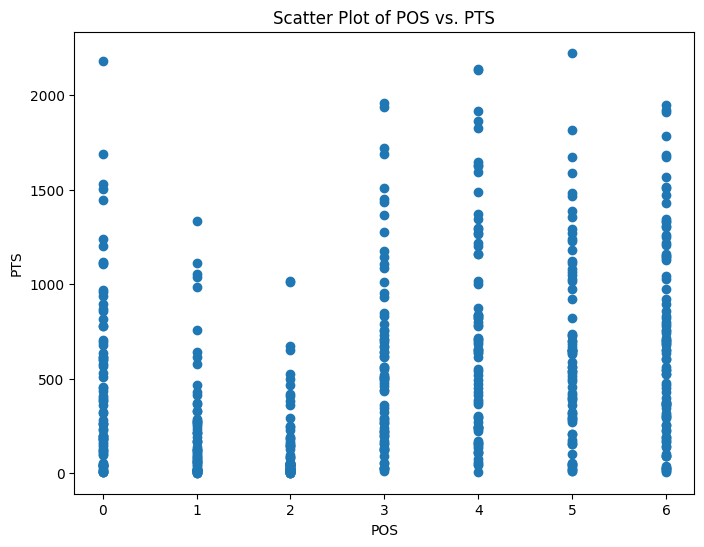

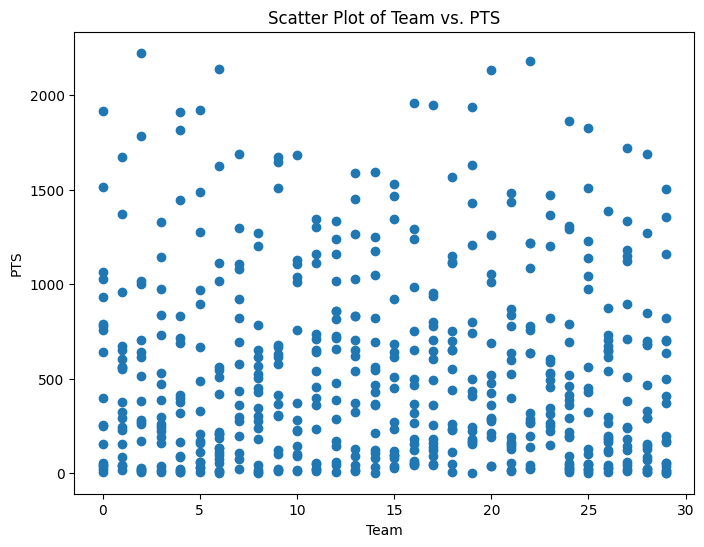

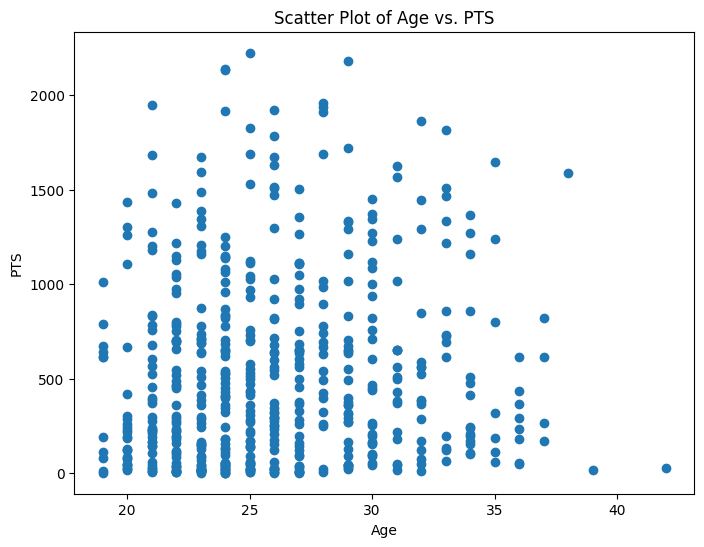

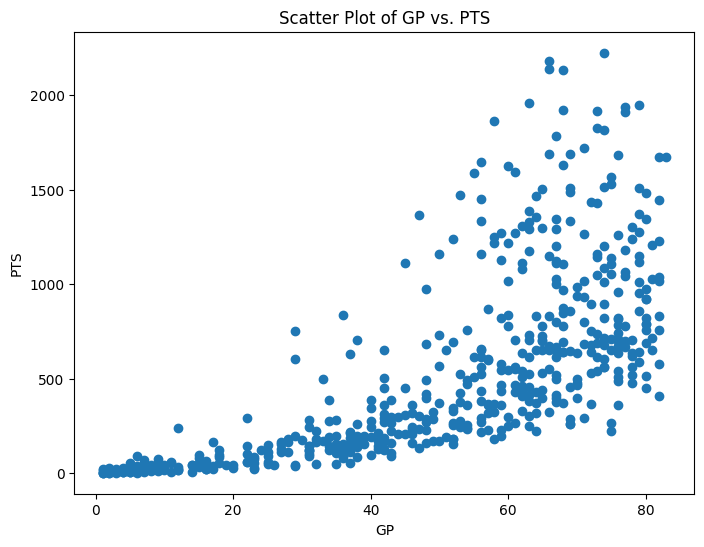

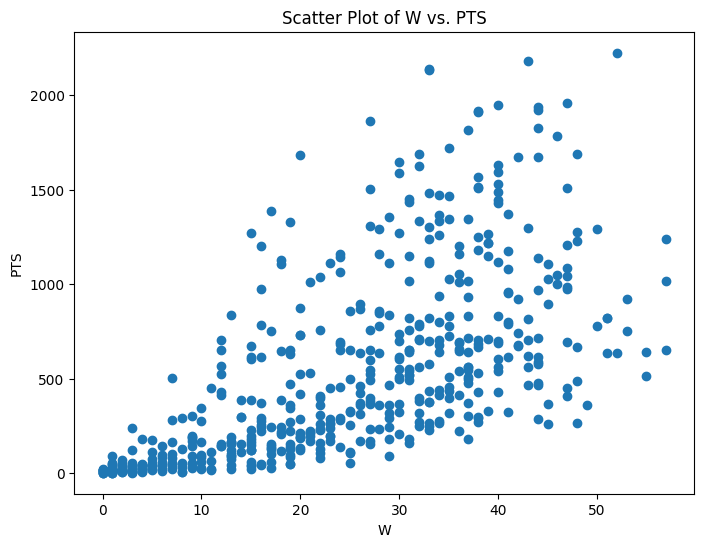

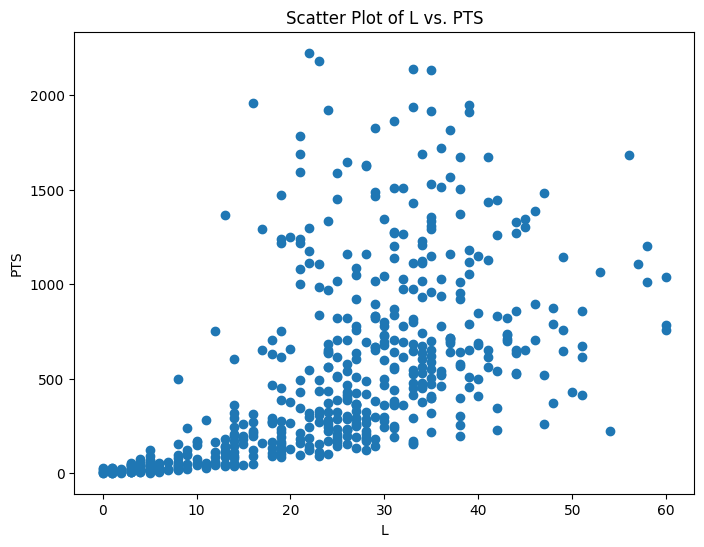

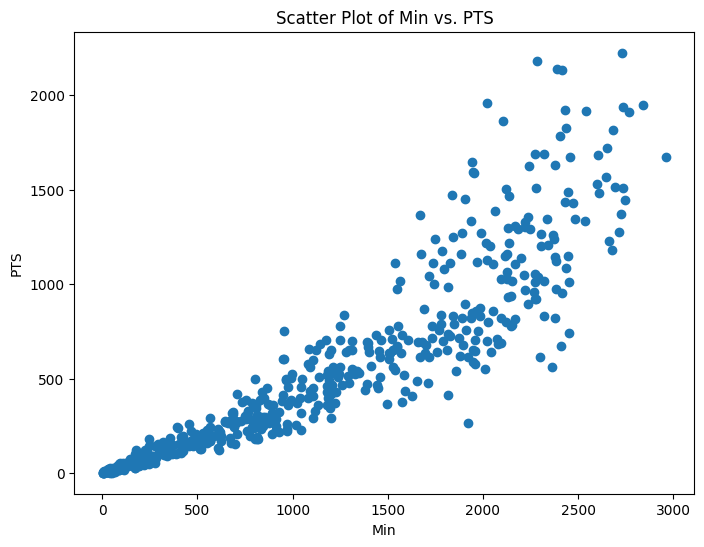

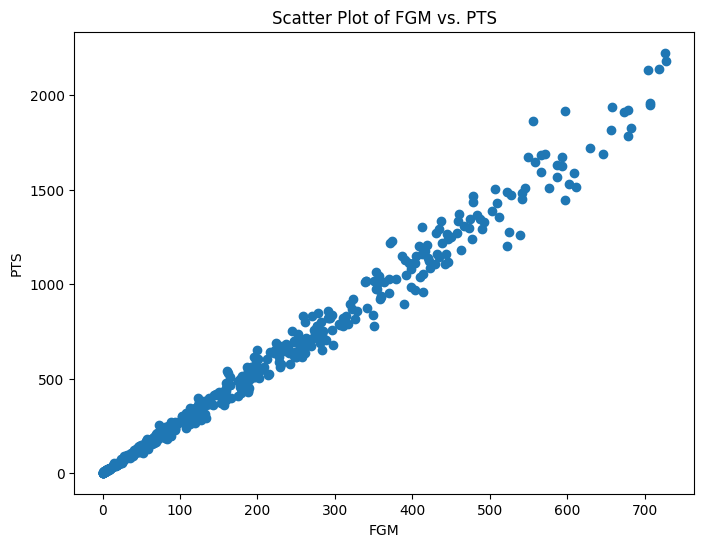

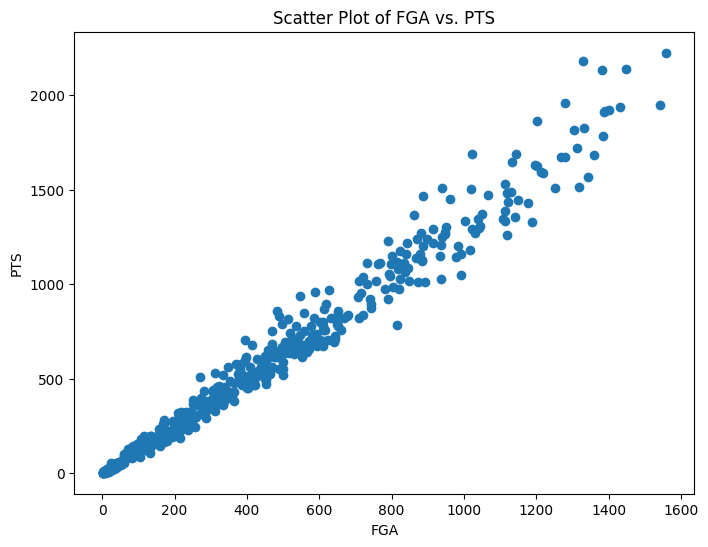

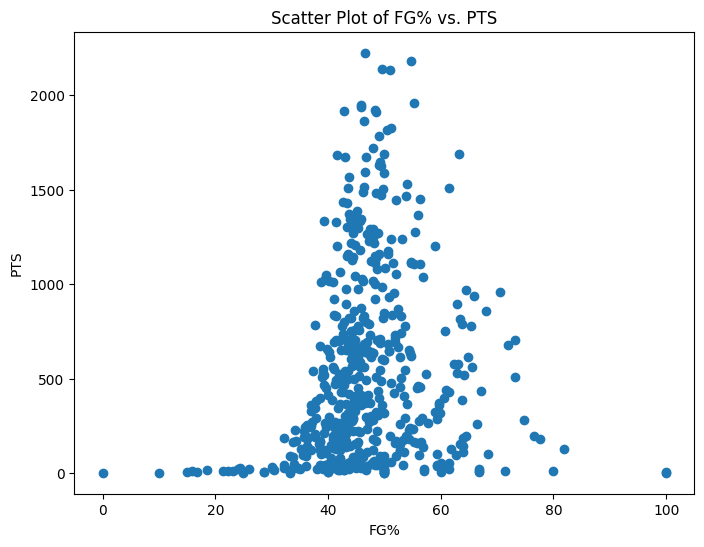

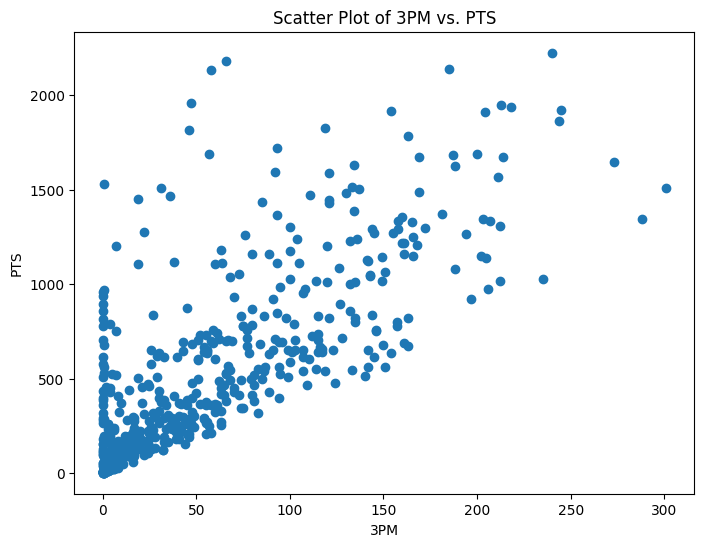

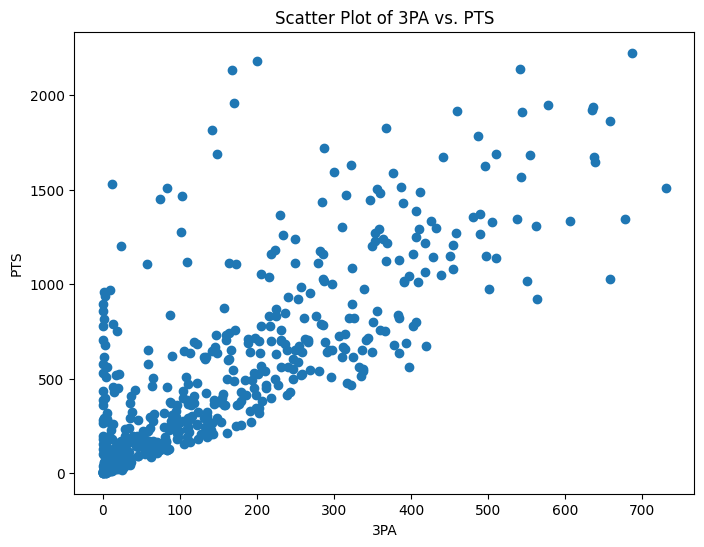

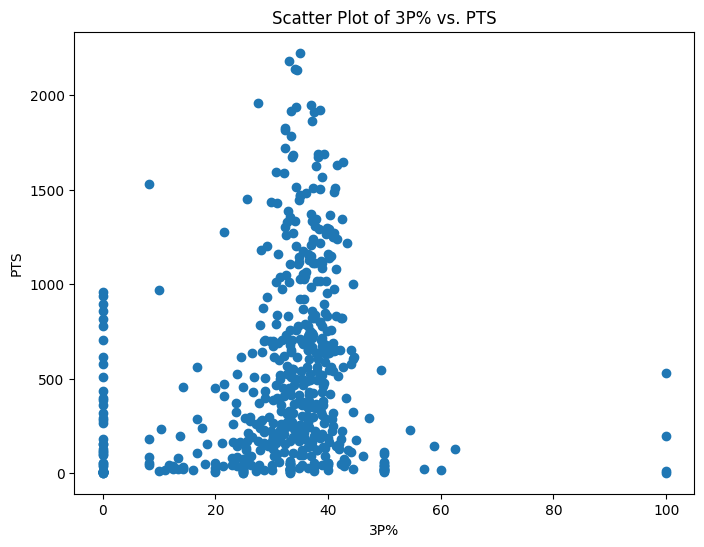

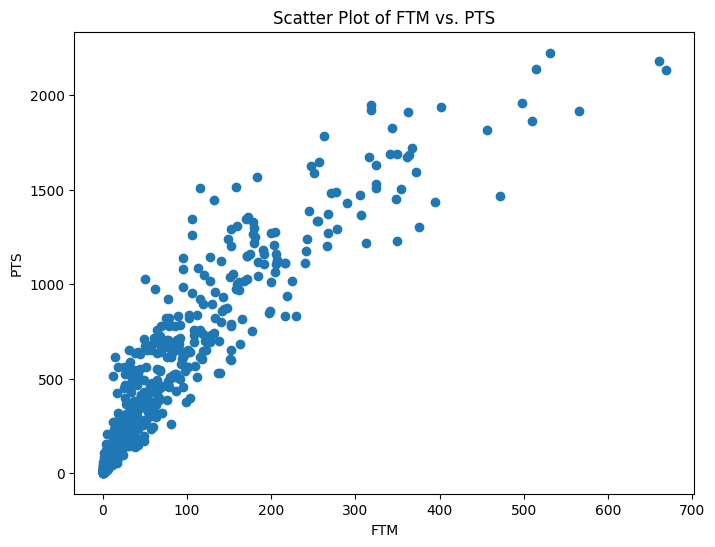

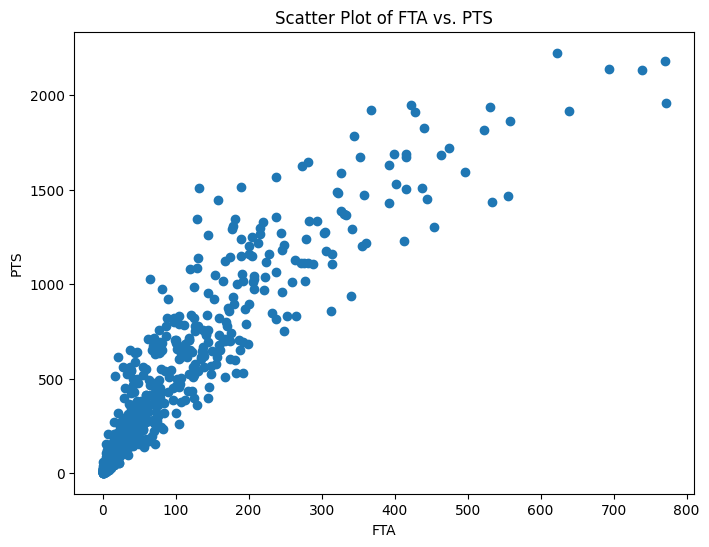

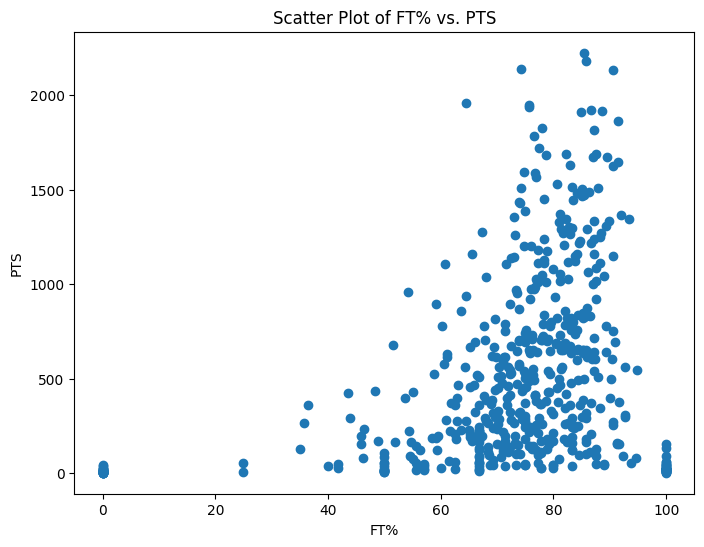

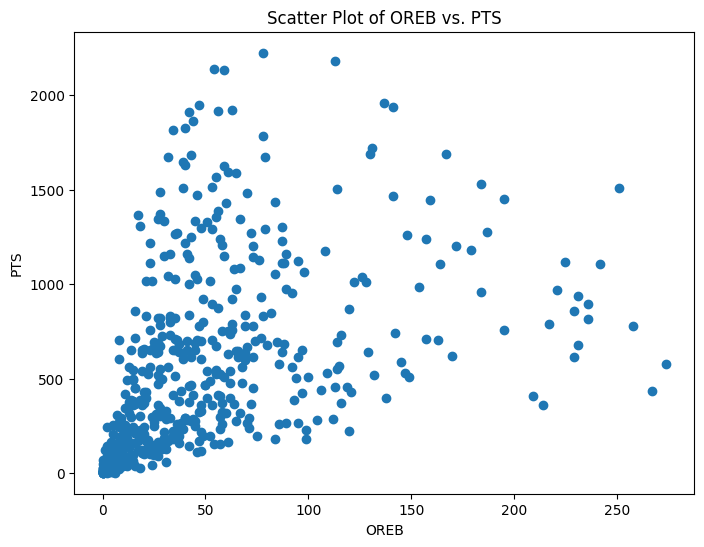

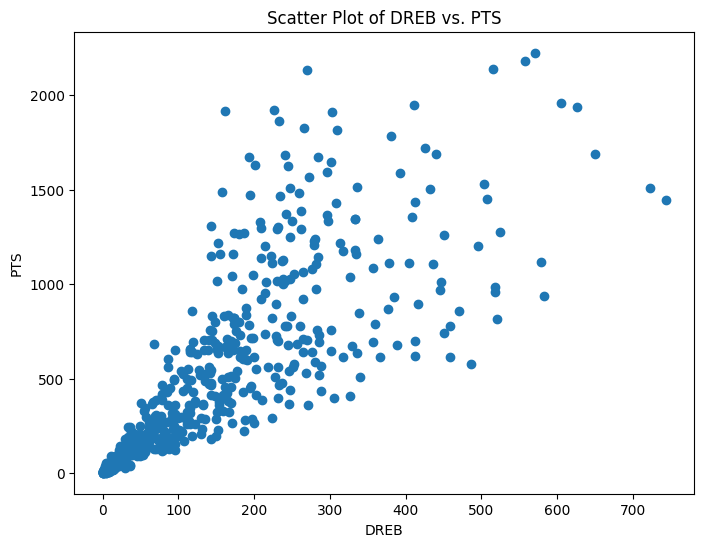

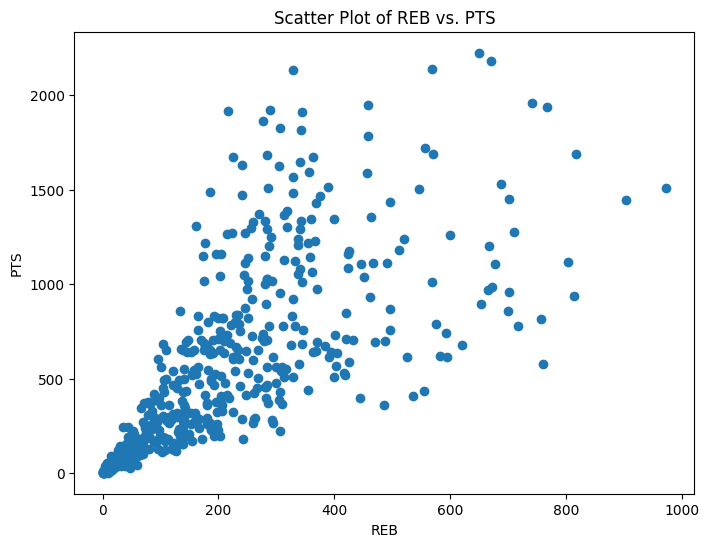

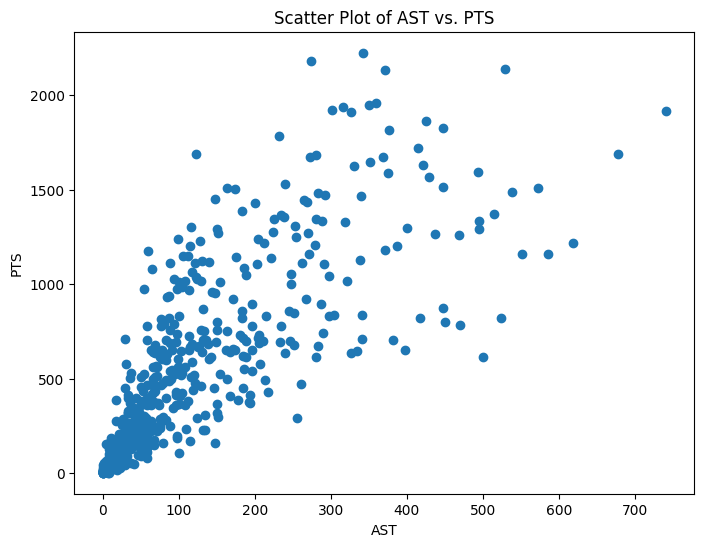

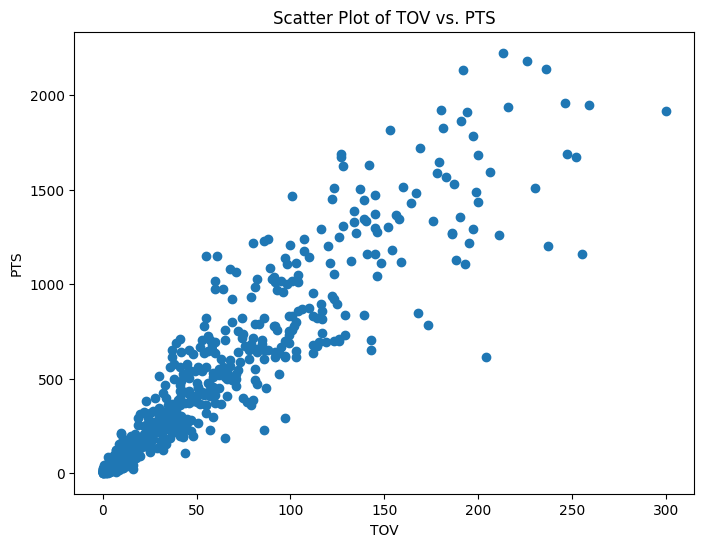

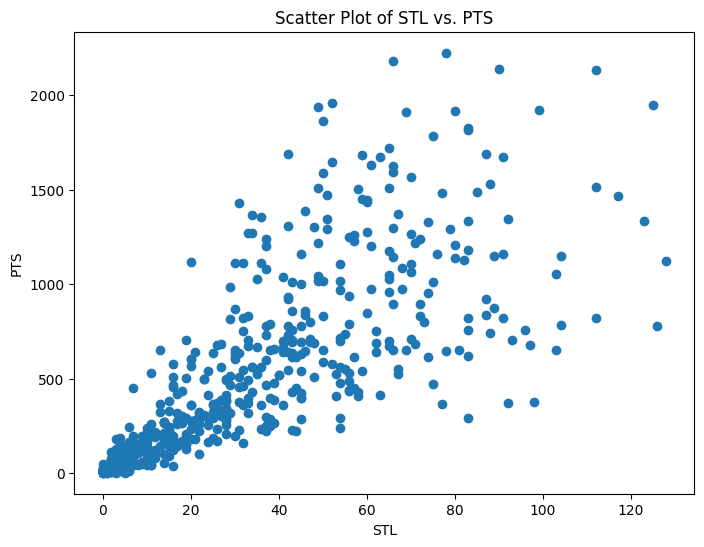

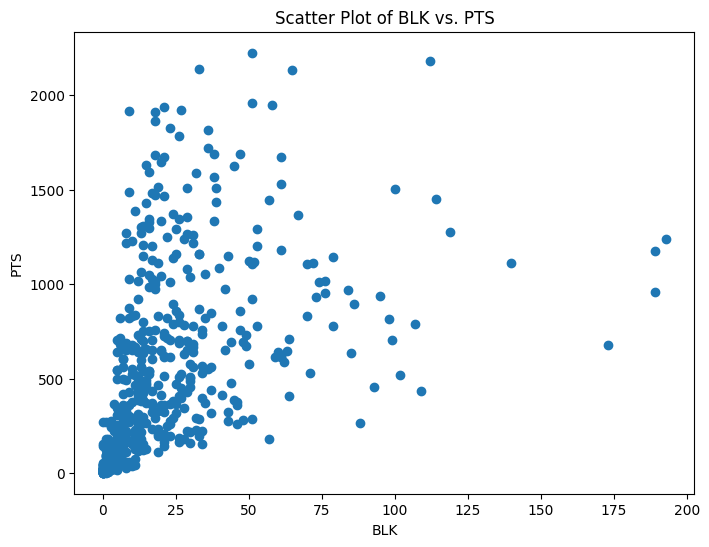

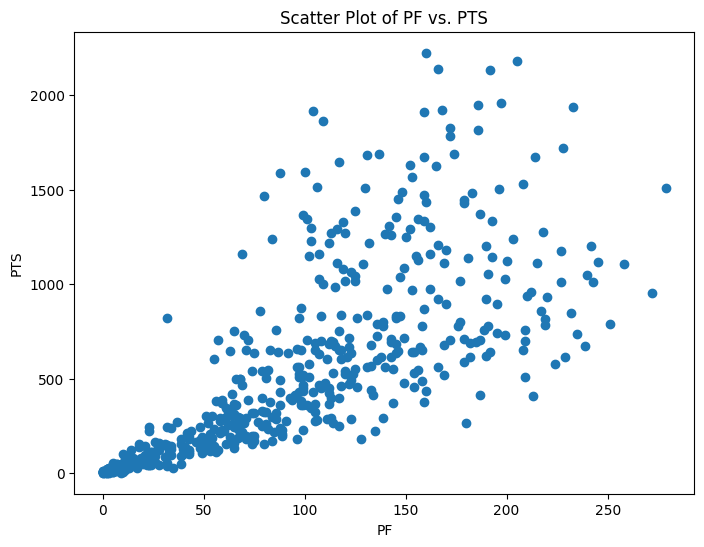

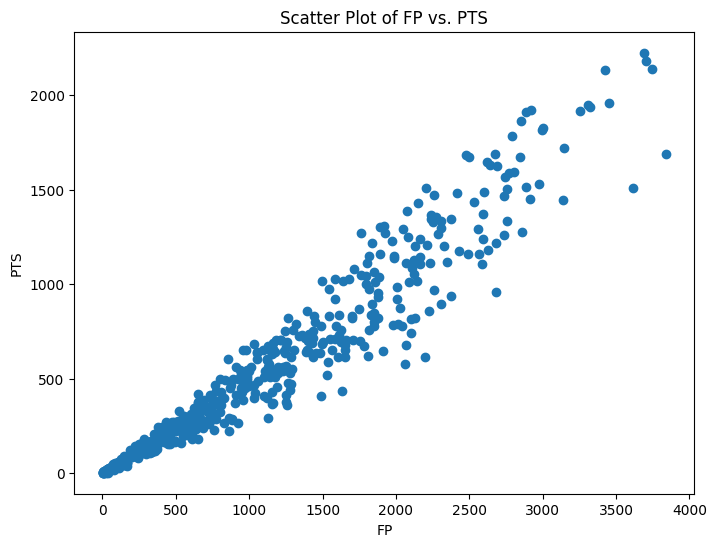

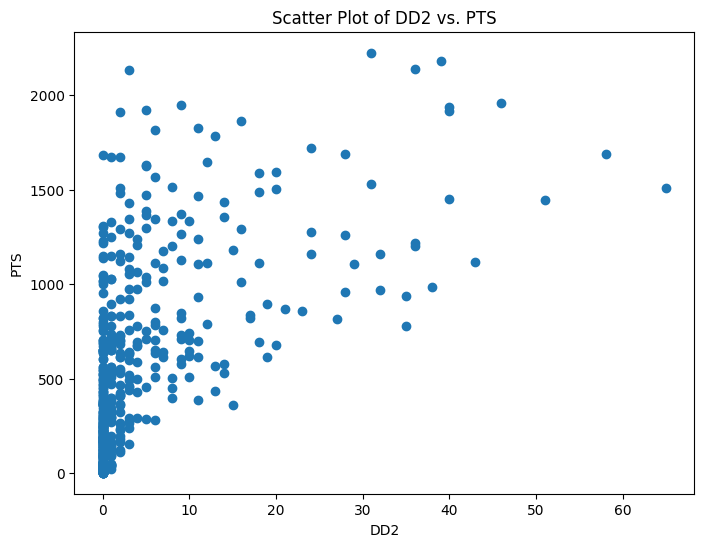

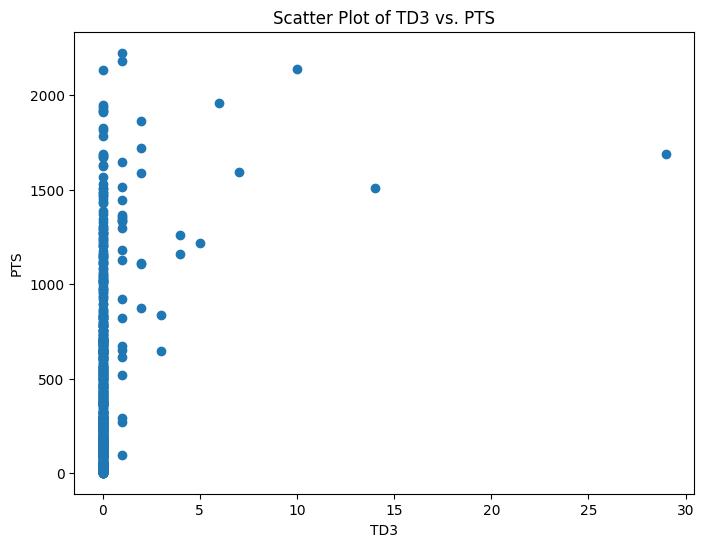

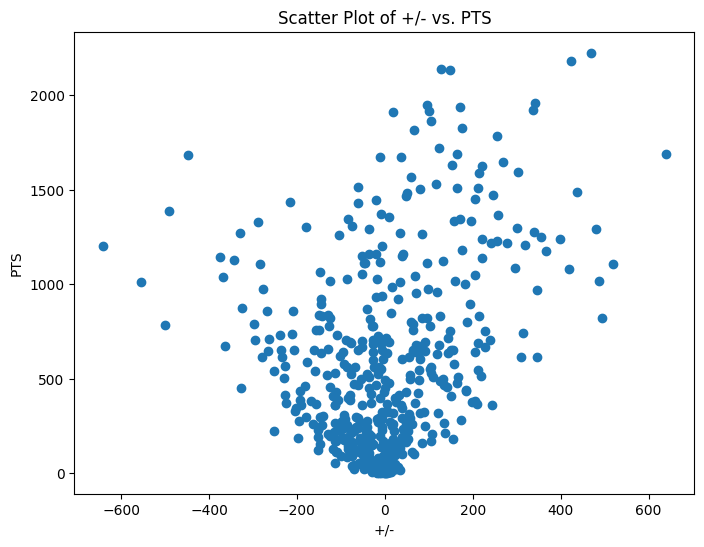

In [ ]:
# prompt:¿ Grafica PTS vs Las columns restantes?
# Check for linearity using scatter plots for numerical features
numerical_cols = X.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.scatter(X[col], y)
  plt.xlabel(col)
  plt.ylabel('PTS')
  plt.title(f'Scatter Plot of {col} vs. PTS')
  plt.show()

Generamos una matriz de correlacion para observar que columnas tienen una correlacion alta y tomar decisiones respecto a lo observado

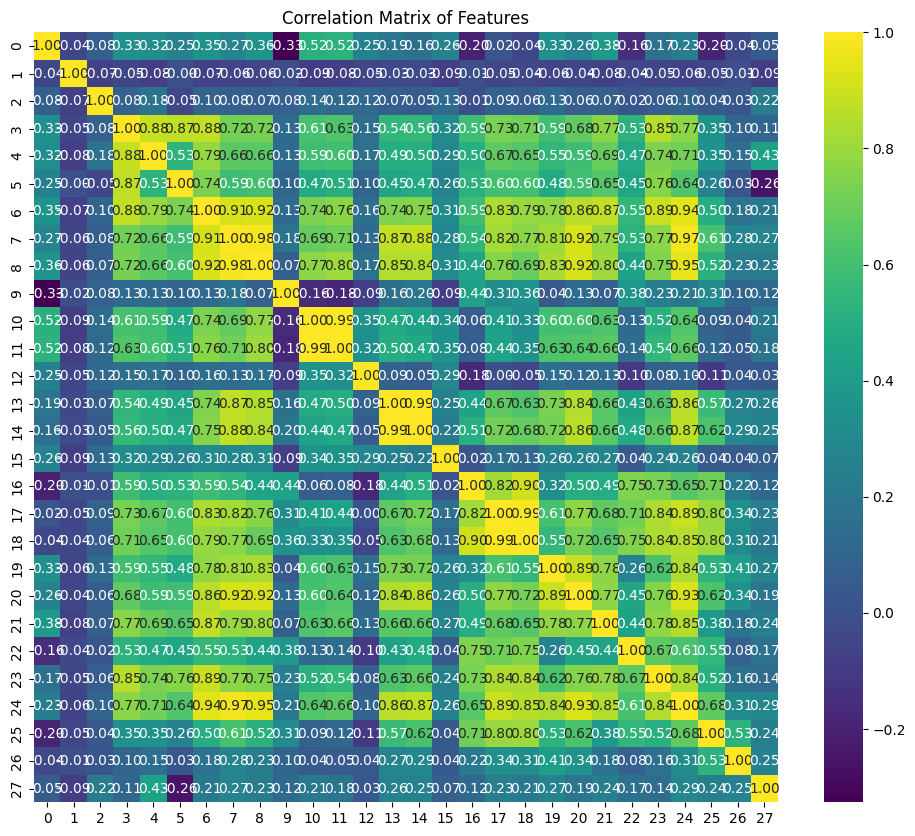

In [ ]:
# prompt: MAtriz de correlacion de las variables
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Determinamos que existen columnas con una covarianza muy alta que pueden afectar a nuestros modelos y tomamos acciones con estas

Fijamos un umbral de correlacion de 0.9 y con la ayuda de la IA eliminamos estas columnas para evitar un sobre ajuste en los modelos .

In [ ]:
# prompt: ELIMINA LAS COLUMNAS CON UNA ALTA CORRELACION PARA EVITAR SOBRE AJUSTE

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)  # Add column names
correlation_matrix = X_train.corr()

# Fijamos el umbral de correlacion alta
correlation_threshold = 0.9
X_test=pd.DataFrame(X_test)
# Find highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > correlation_threshold)]

print("Columnas con alta correlacion:", highly_correlated_features)

# Drop highly correlated features
X_train = X_train.drop(highly_correlated_features, axis=1)
X_test = X_test.drop(highly_correlated_features, axis=1)


# Now X_train and X_test have the highly correlated features removed
print("Forma de X_train despues de eliminar columnas:", X_train.shape)
print("Forma de X_test despues de eliminar columnas:", X_test.shape)


Columnas con alta correlacion: [7, 8, 11, 14, 18, 20, 24]
Forma de X_train despues de eliminar columnas: (427, 21)
Forma de X_test despues de eliminar columnas: (107, 21)


# Modelos e hiperparametros

Definimos para que nos sirve cada modelo para conocerle un poco y porque utilizamos esos hiperparametros
Cabe decir que utlizaremos distintos parametros dependiendo el modelo.






1.   Lasso:
Adecuado para datasets con muchas variables, ya que Lasso selecciona automáticamente las más relevantes eliminando las innecesarias

Hiperparámetro:
alpha: Controla la penalización L1, forzando algunos coeficientes a cero para eliminar variables irrelevantes.
Rango: [0.001, 0.01, 0.1, 1, 10].

Scoring: neg_mean_absolute_error (MAE).
¿Por qué?:MAE facilita interpretar errores medianos y es menos sensible a valores atípicos que el MSE, lo que es útil en modelos con regularización como Lasso.


2.   ElasticNet:Ideal para escenarios donde algunas variables son relevantes, pero no todas como en este caso.

Hiperparámetros:
alpha: Intensidad de la regularización. Valores: [0.001, 0.01, 0.1, 1, 10].
l1_ratio: Peso de la penalización L1 frente a L2. Valores: [0.1, 0.5, 0.9].

Scoring : neg_mean_absolute_error (MAE).
¿Por qué?:ElasticNet ya maneja valores atípicos con regularización. MAE es útil si priorizas interpretar errores medianos sobre penalizar grandes errores (como haría MSE).


3.   KernelRidge:Modela relaciones no lineales

Hiperparámetros:
alpha: Regularización. Rango: [0.01, 0.1, 1, 10].
kernel: Tipo de kernel. Opciones: 'linear', 'rbf', 'poly'.
gamma: Influencia de los puntos en el kernel RBF. Rango: [0.01, 0.1, 1].

Scoring : neg_mean_squared_error.
¿Porque?:El MSE  sirve de ayuda a equilibrar el impacto de errores grandes.


4.   SGDRegressor:Eficiente en datasets grandes.

Hiperparámetros:
alpha: Regularización L2. Rango: [0.0001, 0.001, 0.01].
learning_rate: Ajuste de la tasa de aprendizaje. Opciones: 'constant', 'optimal', 'invscaling'.
max_iter: Iteraciones máximas. Rango: [100, 500, 1000].

5.   BayesianRidge:Estima coeficientes con distribuciones bayesianas.

Hiperparámetros:
alpha_1, alpha_2: Priors para la varianza de coeficientes.
lambda_1, lambda_2: Priors Gamma para los coeficientes.
Rango: [1e-6, 1e-5, 1e-4].
Scoring : neg_mean_squared_error.
Razonamiento: Coherente con la suposición gaussiana del modelo.

6.   GaussianProcessRegressor: Modela relaciones complejas, pero es computacionalmente costoso.

Hiperparámetros:
kernel: Relación no lineal (e.g., RBF, Matern).
alpha: Regularización para ruido. Rango: [1e-10, 1e-8, 1e-6].
Scoring:neg_mean_absolute_percentage_error.
Razonamiento: Flexible para relaciones complejas; MSE y MAPE dependen del rango de datos.
7.   RandomForestRegressor: No requiere escalado.

Hiperparámetros:
n_estimators: Número de árboles. Rango: [50, 100, 200].
max_depth: Profundidad máxima. Rango: [None, 10, 20].
min_samples_split: Tamaño mínimo para dividir nodos. Rango: [2, 5, 10].
Scoring : neg_mean_squared_error.
Razonamiento: Penaliza grandes errores para optimizar el desempeño, siendo robusto frente a valores atípicos.

8.    SVR (Support Vector Regressor):Relación no lineal entre variables.

Hiperparámetros:
C: Penalización por errores. Rango: [0.1, 1, 10].
gamma: Influencia de puntos en kernel RBF. Opciones: 'scale', 'auto'.
epsilon: Margen sin penalización por errores. Rango: [0.1, 0.2, 0.5].
Scoring: neg_mean_absolute_error o neg_mean_squared_error.
Razonamiento: MAE evalúa errores generales, mientras que MSE considera el impacto de valores atípicos







# Creacion de modelos utilizando los hiperparametros considerados anteriormente

Para esta parte creamos los modelos utilizando los hiperparametros considerados anteriormente

In [ ]:
# Diccionario para almacenar los modelos, sus hiperparámetros y criterios de scoring
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {},
        "scoring": "neg_mean_absolute_error"
    },
    "Lasso": {
        "model": Lasso(),
        "params": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
        "scoring": "neg_mean_absolute_error"
    },
    "ElasticNet": {
        "model": ElasticNet(max_iter=50000),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10],
            "l1_ratio": [0.1, 0.5, 0.9]
        },
        "scoring": "neg_mean_squared_error"
    },
    "KernelRidge": {
        "model": KernelRidge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": [0.01, 0.1, 1]
        },
        "scoring": "neg_mean_squared_error"
    },
    "SGDRegressor": {
        "model": SGDRegressor(max_iter=1000, tol=1e-3),
        "params": {
            "alpha": [0.0001, 0.001, 0.01],
            "learning_rate": ["constant", "optimal", "invscaling"],
            "max_iter": [100, 500, 1000]
        },
        "scoring": "neg_mean_absolute_error"
    },
    "BayesianRidge": {
        "model": BayesianRidge(),
        "params": {
            "alpha_1": [1e-6, 1e-5, 1e-4],
            "alpha_2": [1e-6, 1e-5, 1e-4]
        },
        "scoring": "neg_mean_squared_error"
    },
    "GaussianProcessRegressor": {
        "model": GaussianProcessRegressor(),
        "params": {
            "alpha": [1e-10, 1e-8, 1e-6],
            "kernel": [RBF(), Matern()]
        },
        "scoring": "neg_mean_squared_error"
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        },
        "scoring": "neg_mean_squared_error"
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "gamma": ["scale", "auto"],
            "epsilon": [0.1, 0.2, 0.5]
        },
        "scoring": "neg_mean_absolute_error"
    }
}

# Lista para almacenar los resultados
results = []

# Realizar GridSearchCV para cada modelo con su respectivo scoring
for model_name, config in models.items():
    print(f"Entrenando {model_name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring=config["scoring"], n_jobs=-1)
    grid.fit(X_train, y_train)
    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Best Score": grid.best_score_
    })

# Mostrar los resultados
pd.DataFrame(results)


Entrenando LinearRegression...
Entrenando Lasso...
Entrenando ElasticNet...
Entrenando KernelRidge...
Entrenando SGDRegressor...
Entrenando BayesianRidge...
Entrenando GaussianProcessRegressor...
Entrenando RandomForestRegressor...
Entrenando SVR...


,Model,Best Params,Best Score
0,LinearRegression,{},-56.129552
1,Lasso,{'alpha': 1},-54.877226
2,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",-6875.224664
3,KernelRidge,"{'alpha': 1, 'gamma': 0.01, 'kernel': 'poly'}",-8727.969527
4,SGDRegressor,"{'alpha': 0.01, 'learning_rate': 'invscaling',...",-55.700953
5,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 0.0001}",-6934.998171
6,GaussianProcessRegressor,"{'alpha': 1e-06, 'kernel': Matern(length_scale...",-19169.694149
7,RandomForestRegressor,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",-12020.018472
8,SVR,"{'C': 10, 'epsilon': 0.1, 'gamma': 'auto'}",-205.765655


Dados los resultados obtenidos re evaluamos y obtenemos las metricas para cada modelo MSE,MAE,MAPE,R2

In [ ]:
# Lista para almacenar los resultados finales
final_results = []

# Evaluar cada modelo en el conjunto de prueba
for result in results:
    model_name = result["Model"]
    best_params = result["Best Params"]

    # Obtener el modelo con los mejores parámetros
    model = models[model_name]["model"].set_params(**best_params)

    # Entrenar el modelo con los mejores parámetros
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100

    # Guardar resultados
    final_results.append({
        "Model": model_name,
        "Best Params": best_params,
        "MAE": mae,
        "MSE": mse,
        "R²": r2,
        "MAPE (%)": mape
    })

# Mostrar resultados en un DataFrame ordenado por MAE
final_results_df = pd.DataFrame(final_results)
final_results_df.sort_values(by="MAE", ascending=True, inplace=True)
final_results_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame
final_results_df


,Model,Best Params,MAE,MSE,R²,MAPE (%)
0,RandomForestRegressor,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",69.020389,11676.425836,0.963097,22.384762
1,GaussianProcessRegressor,"{'alpha': 1e-06, 'kernel': Matern(length_scale...",69.582699,15647.217379,0.950547,27.520389
2,Lasso,{'alpha': 1},71.094477,10400.350172,0.967130,77.364603
3,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",72.869366,10608.333040,0.966472,83.101071
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 0.0001}",73.162690,10634.154983,0.966391,82.812981
5,LinearRegression,{},73.165365,10632.669056,0.966396,82.277086
6,SGDRegressor,"{'alpha': 0.01, 'learning_rate': 'invscaling',...",73.721817,10931.363214,0.965452,90.327522
7,KernelRidge,"{'alpha': 1, 'gamma': 0.01, 'kernel': 'poly'}",76.841922,12983.674405,0.958965,72.032099
8,SVR,"{'C': 10, 'epsilon': 0.1, 'gamma': 'auto'}",274.467305,195991.448659,0.380571,551.674880


#Calcular los valores promedio y la desviación estándar de las métricas de evaluación para cada modelo y compararlos en graficos interactivos


con el uso de la IA de colab obtenemos los rendimientos promedios

In [ ]:
# prompt: presenta  los rendimientos promedio en los datos de evaluacion con su respectiva desviacion  estandar para las metricas anteriores

# Calculate the mean and standard deviation of the evaluation metrics
metrics = ['MAE', 'MSE', 'R²', 'MAPE (%)']
metric_stats = {}

for metric in metrics:
    metric_stats[metric] = {
        'mean': final_results_df[metric].mean(),
        'std': final_results_df[metric].std()
    }

# Print the results
for metric, stats in metric_stats.items():
    print(f"Métrica: {metric}")
    print(f"  Promedio: {stats['mean']:.2f}")
    print(f"  Desviación estándar: {stats['std']:.2f}")
    print("-" * 20)

Métrica: MAE
  Promedio: 94.88
  Desviación estándar: 67.39
--------------------
Métrica: MSE
  Promedio: 32167.29
  Desviación estándar: 61457.43
--------------------
Métrica: R²
  Promedio: 0.90
  Desviación estándar: 0.19
--------------------
Métrica: MAPE (%)
  Promedio: 121.06
  Desviación estándar: 163.39
--------------------


Graficamos en Diagramas de barras las metricas obtenidas para cada modelo para una mejor visualizacion

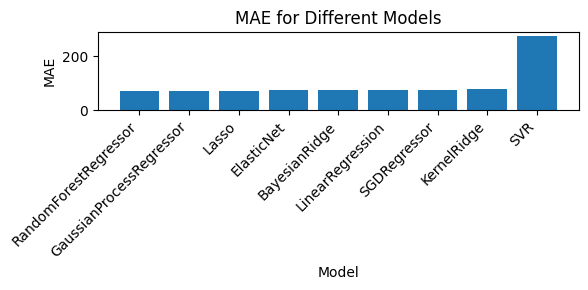

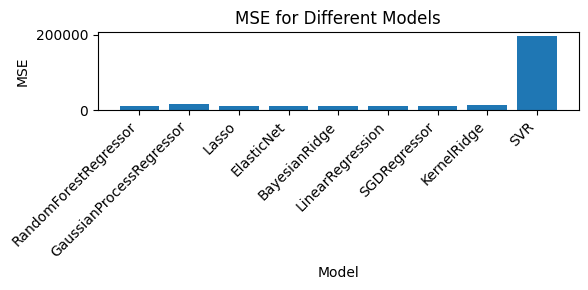

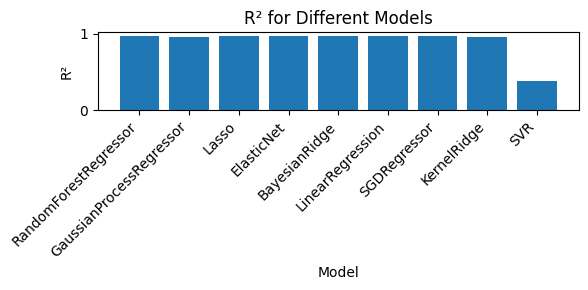

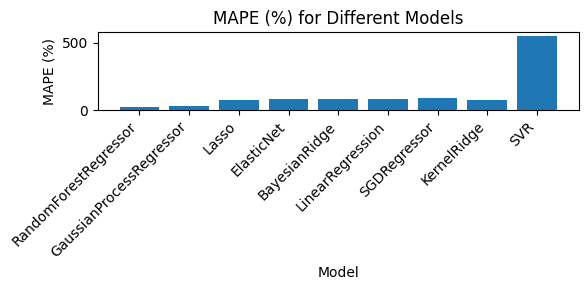

In [ ]:
# prompt: grafica lo anterior

import matplotlib.pyplot as plt

# Assuming 'final_results_df' is your DataFrame with model performance metrics

# Create bar plots for each metric
metrics = ['MAE', 'MSE', 'R²', 'MAPE (%)']
for metric in metrics:
    plt.figure(figsize=(6, 3))
    plt.bar(final_results_df['Model'], final_results_df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

#Resultados
Para finalizar graficamos los valores reales vs redicciones para cada modelo.



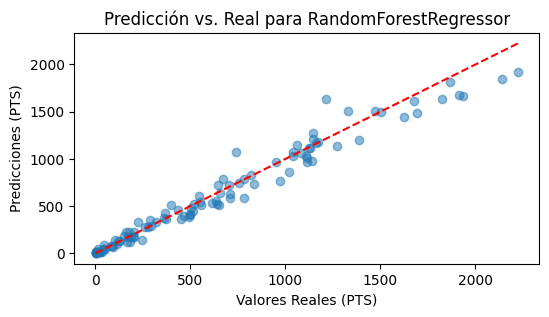

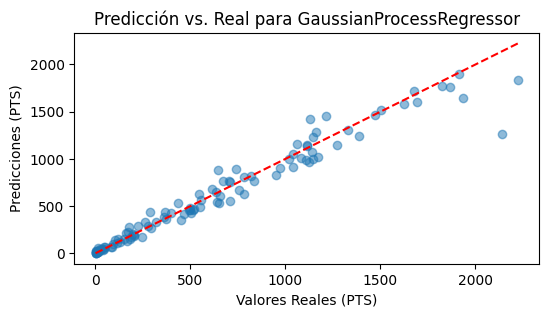

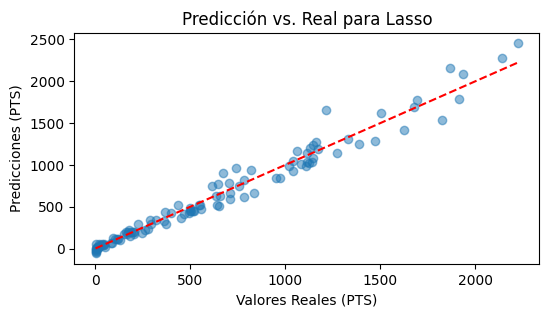

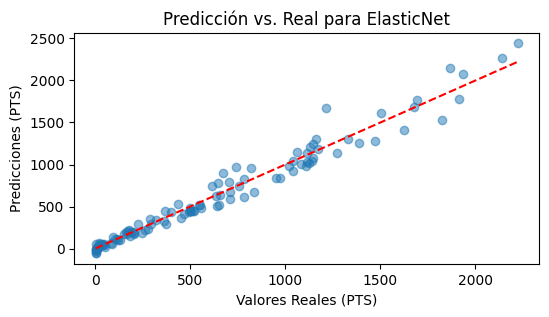

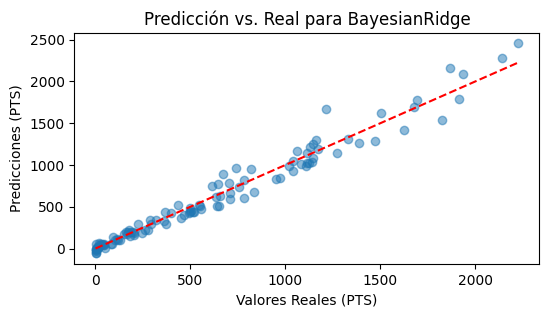

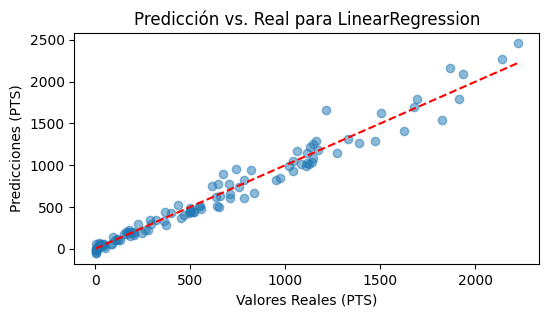

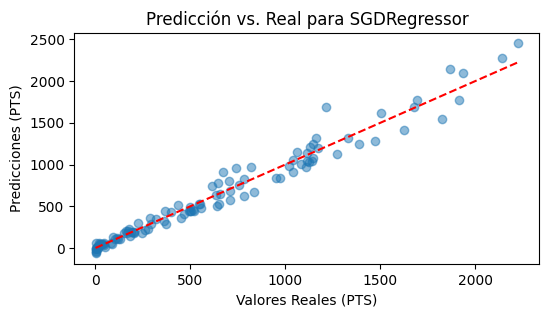

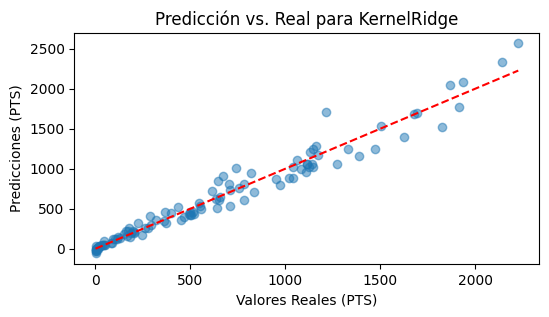

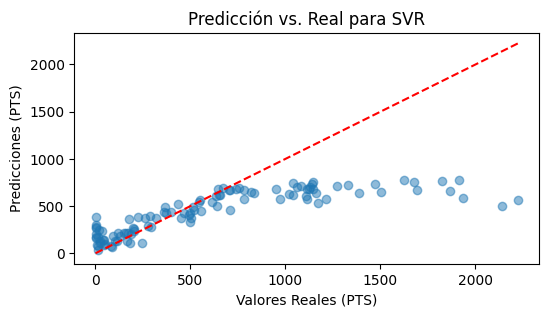

In [ ]:
import matplotlib.pyplot as plt


for index, row in final_results_df.iterrows():
    model_name = row['Model']
    model = models[model_name]['model'].set_params(**row['Best Params'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6, 3))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Valores Reales (PTS)")
    plt.ylabel("Predicciones (PTS)")
    plt.title(f"Predicción vs. Real para {model_name}")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
    plt.show()

#Conclusiones



En un principio el desempeño de los modelos era perfecto ,lo cual genero dudas respecto a si se estaba sobre ajustando .Dado eso se realizo una depuracion de las columnas con mayor covarianza que podrian estar ocacionando esto,del mismo modo se tiene en cuenta de que los modelos pueden verse afectados por esta accion.
luego de realizar esto se determino que si estaba ocurriendo un sobre ajuste y lo mejor era que el modelo se entrenara sin esas columnas,obteniendo un resultado aceptable

El Support Vector Regressor (SVR) puede no desempeñarse tan bien como otros modelos en esta base de datos debido a varias razones,alguna de ellas puede ser eque el svr no es capar de encontrar unan solucion optima  debido a restricciones de tiempo o de memoria.Si los hiperparámetros no están ajustados correctamente a las características de tu base de datos, el modelo puede tener un rendimiento inferior.

Por otro lado modelos como RandomForestRegressor o GradientBoosting suelen ser más robustos en conjuntos de datos ruidosos o con relaciones no lineales porque pueden manejar valores atípicos y ruido mejor que SVR y a su vez
capturan automáticamente relaciones no lineales entre características sin necesidad de especificar un kernel.

Cabe destacar que era esperado que los desempeños de los modelos no serian iguales dados sus pros y contras y los datos sobre los cuales se trabajo,es recomendable para modelos a futuro analizar detenidamente que modelo utilizar teniendo en cuenta las caracteristicas de los datos y el tipo de relacion que tienen estos,a pesar de que las cosas puedan estar perfectas.